<h1>Exploratory Data Analysis</h1>

We're going to do some data exploration. For that, we'll need some date. You can find a video game dataset, among 200k other public datasets, available to download at <a href="https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023?resource=download">Kaggle</a>. We've already downloaded it for you and you'll find it, named *games.csv*, in the 07-data-processing folder.

We will need to install some new libraries for this analysis: pandas and seaborn.

In [2]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install numpy

#import the libraries we'll be using

import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.parser import parse

<h3>Read the dataset</h3>
Pandas is a library for working with data, you'll encounter it in nearly any python data analysis project. Here we will use the read_csv() function to create a dataframe.

In [3]:
filepath = "../games.csv"
data = pd.read_csv(filepath,index_col = 0)
# index_col is just indicating that there is a row number stored in the first column

<h3>Preview the data</h3>

You can use the head() function to view the column headers and first few rows of data.

In [4]:
data.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


The shape member gives the number of rows and columns in the entire dataframe. The info() function gives us some information about the columns. Here it's not particularly interesting, but we can see, for example that the rating is a numerical value.

In [5]:
data.shape

(1512, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB


<h3>Missing Values</h3>

Notice the column above labeled "Non-Null Count". See how most columns have 1512 non-null values and this is the number of entries in the dataframe. So those columns are not missing any values.

Note how Team and Rating have fewer than 1512 non-null values? We can display this a bit more clearly with a more custom-built table.

In [7]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  1512


,Total Missing,In Percent
Rating,13,0.86
Team,1,0.07
Summary,1,0.07
Release Date,0,0.00
Title,0,0.00
Times Listed,0,0.00
Number of Reviews,0,0.00
Genres,0,0.00
Reviews,0,0.00
Plays,0,0.00


We can manually replace those missing values. This prevents that they will cause problems with our calculations later. You'll learn more about replacing missing values in Machine Learning and Data Analytics next year.

For now, we'll replace a missing rating with the average of all ratings; we can use the mean function to calculate that. And we'll replace missing text from Team and Summary by "Unknown".

In [8]:
mean_rating = data['Rating'].mean()

data['Rating'] = data['Rating'].replace(np.nan, mean_rating)
data['Team'] = data['Team'].replace(np.nan, "['Unknown Team']")
data['Summary'] = data['Summary'].replace(np.nan, 'Unknown Summary')

Let's recreate our table from above to check our replacements.

In [9]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  1512


,Total Missing,In Percent
Title,0,0.0
Release Date,0,0.0
Team,0,0.0
Rating,0,0.0
Times Listed,0,0.0
Number of Reviews,0,0.0
Genres,0,0.0
Summary,0,0.0
Reviews,0,0.0
Plays,0,0.0


We've successfully replaced all the missing values.

<h3>Finding Duplicates</h3>

There are also functions for finding and removing duplicate data.

In [10]:
duplicates = data[data.duplicated()]

duplicates.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
326,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
327,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
328,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
329,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
330,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


We're a bit lucky here, because some of the duplicated rows are also present in the head() we saw at the beginning. So we can compare easily and see that Elden Ring at line 0 and line 326 is indeed the same data. Since we're going to drop these from the original dataframe, we can store them here in their own dataframe. IN reality, this is likely unnecessary since we don't have any need to work further with the duplicated rows.

In [11]:
data = data.drop_duplicates()

data.shape

(1130, 13)

Now we're down to 1130 rows instead of the original 1512.

Next we'd like to represent the Release Date as a DateTime instead of a string. This allows us to order things chronologically for example.

In [12]:
# convert the date column to a datetime object
data['Release Date'] = pd.to_datetime(data['Release Date'])

# get the day from the date column
data['Day'] = data['Release Date'].dt.day
data['Month'] = data['Release Date'].dt.strftime('%b')
data['Year'] = data['Release Date'].dt.year
data['Week day'] = data['Release Date'].dt.day_name()

ValueError: time data "releases on TBD" doesn't match format "%b %d, %Y", at position 423. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Oops! Something went wrong. See the ValueError at the bottom of the output.

"ValueError: time data "releases on TBD" doesn't match format "%b %d, %Y", at position 423."

So there are some entries in our dataframe that have not (or had not at the time this dataset was scraped) been released. We obviously can't parse a DateTime object out of "releases on TBD".

<h3>Cleaning the Data</h3>

Just like we replaced the missing values (nan) above, we can also replace these TBD dates. For simplicity, we can simply set them to today's date (or some future date if you prefer).

In [13]:
# create a datetime object with the current time
dt = datetime.now()
# convert the datetime object to a string
dt_str = dt.strftime('%b %d, %Y')
# replace the TBD dates to the current date string
data['Release Date'] = data['Release Date'].str.replace('releases on TBD', dt_str )

Let's try that again.

In [16]:
# convert the date column to a datetime object
data['Release Date'] = pd.to_datetime(data['Release Date'])

# add columns for Day, Month, and Year based on the Release Date Column data
data['Day'] = data['Release Date'].dt.day
data['Month'] = data['Release Date'].dt.strftime('%b')
data['Year'] = data['Release Date'].dt.year

# add a Week Day column with the day of the week that the game was released on
data['Week day'] = data['Release Date'].dt.day_name()

Let's have another look at the data:

In [15]:
data.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Day,Month,Year,Week day
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K,25,Feb,2022,Friday
1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K,10,Dec,2019,Tuesday
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K,3,Mar,2017,Friday
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K,15,Sep,2015,Tuesday
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K,24,Feb,2017,Friday


If you recall, Rating is already a numeric value, but Times Listed, Number of Reviews, and others are not. Since we'd like to be able to analyze these, we can also covert these to numeric datatypes.

In [17]:
# K represents 1000 so we multiply by 1000 in all these columns

data['Times Listed'] = data['Times Listed'].str.replace('K', '').astype(float) * 1000
data['Number of Reviews'] = data['Number of Reviews'].str.replace('K', '').astype(float) * 1000
data['Plays'] = data['Plays'].str.replace('K', '').astype(float) * 1000
data['Playing'] = data['Playing'].str.replace('K', '').astype(float) * 1000
data['Backlogs'] = data['Backlogs'].str.replace('K', '').astype(float) * 1000
data['Wishlist'] = data['Wishlist'].str.replace('K', '').astype(float) * 1000

data.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Day,Month,Year,Week day
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0,25,Feb,2022,Friday
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900.0,2900.0,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0,10,Dec,2019,Tuesday
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0,3,Mar,2017,Friday
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500.0,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679000.0,4900.0,1800.0,15,Sep,2015,Tuesday
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000.0,3000.0,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,2400.0,8300.0,2300.0,24,Feb,2017,Friday


<h3>Descriptive Statistics</h3>

Now that we have converted our strings to numeric values, we can easily compute some descriptive statistics. In fact, pandas provides a describe() function for this.

In [18]:
data.describe()

,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Day,Year
count,1130,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000
mean,2012-04-19 09:51:17.522124032,3.661727,335949.380531,335949.380531,72116.814159,143502.831858,266277.079646,292199.115044,17.117699,2011.735398
min,1980-05-22 00:00:00,0.700000,0.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,1.000000,1980.000000
25%,2006-11-19 00:00:00,3.400000,106000.000000,106000.000000,2400.000000,29000.000000,2100.000000,54000.000000,11.000000,2006.000000
50%,2013-11-14 12:00:00,3.700000,295000.000000,295000.000000,5100.000000,74000.000000,147500.000000,217000.000000,18.000000,2013.000000
75%,2019-06-18 06:00:00,4.100000,518500.000000,518500.000000,12000.000000,176000.000000,492000.000000,480000.000000,24.000000,2019.000000
max,2025-03-31 00:00:00,4.800000,995000.000000,995000.000000,992000.000000,999000.000000,999000.000000,995000.000000,31.000000,2025.000000
std,NaN,0.537487,269781.315935,269781.315935,199128.914675,182864.941113,300323.755738,267520.216729,8.376194,8.645866


<h3>Text Variables</h3>

Have a look again at the data.head() output from earlier. Notice how Team, Genres, and Reviews can have multiple values for a single entry. These columns are actually stored as lists so more than one Team or more than one Genre can be attached to the same game.

Pandas has an explode() function to create separate rows (each with the same index) to represent the multiple values.

In [19]:
data['Team'] = data['Team'].apply(lambda x: ast.literal_eval(x))

# create a sample DataFrame with a column containing multiple values
df_team = pd.DataFrame({
    'Title': data['Title'].tolist(),
    'Team': data['Team'].tolist()
})
# use the explode method to transform the 'Team' column
df_team = df_team.explode('Team')
df_team

,Title,Team
0,Elden Ring,Bandai Namco Entertainment
0,Elden Ring,FromSoftware
1,Hades,Supergiant Games
2,The Legend of Zelda: Breath of the Wild,Nintendo
2,The Legend of Zelda: Breath of the Wild,Nintendo EPD Production Group No. 3
...,...,...
1126,Team Sonic Racing,Sega
1127,Dragon's Dogma,Capcom
1128,Baldur's Gate 3,Larian Studios
1129,The LEGO Movie Videogame,WB Games


In [20]:
data['Genres'] = data['Genres'].apply(lambda x: ast.literal_eval(x))

# create a sample DataFrame with a column containing multiple values
df_genres = pd.DataFrame({
    'Title': data['Title'].tolist(),
    'Genres': data['Genres'].tolist()
})
# use the explode method to transform the 'Team' column
df_genres = df_genres.explode('Genres')
df_genres

,Title,Genres
0,Elden Ring,Adventure
0,Elden Ring,RPG
1,Hades,Adventure
1,Hades,Brawler
1,Hades,Indie
...,...,...
1128,Baldur's Gate 3,Strategy
1128,Baldur's Gate 3,Tactical
1128,Baldur's Gate 3,Turn Based Strategy
1129,The LEGO Movie Videogame,Adventure


<h3>Data Visualization</h3>

A Histogram, also called a Distribution graph, shows how many entries (or rows) have a certain value or range of values.

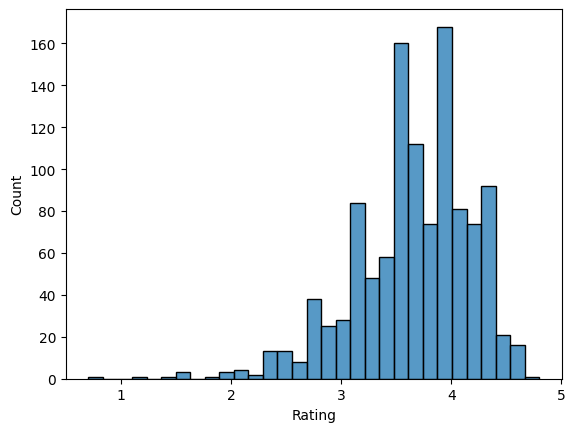

In [21]:
top_rating = data[['Title','Rating']].sort_values(by = 'Rating', ascending = False)

sns.histplot(data = data['Rating'])

plt.show()


Based on the histogram generated above, what are some conclusions you can make about video game ratings?

Things to consider:
* Are video game ratings evenly spread across the possible ratings or seem to follow a pattern?
* Video games tend to be rated around what value?


Remember how we used explode() to break out the multiple genres for each game. We can use that to show how many of each genre there are. Then plot them in a bar graph or pie chart.

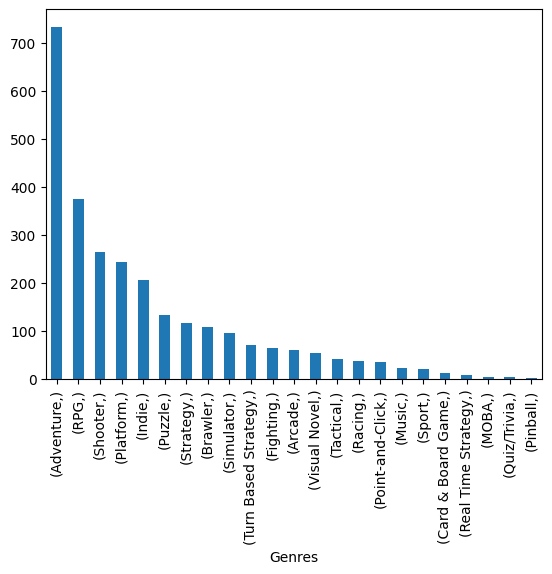

In [22]:
list_genres = pd.DataFrame(df_genres['Genres'])
count_genres = list_genres.value_counts().plot(kind='bar')

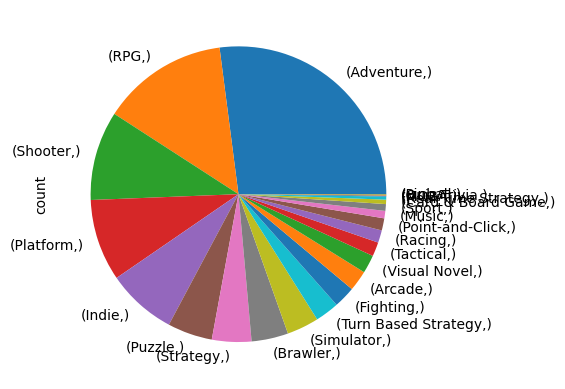

In [23]:
count_genres = list_genres.value_counts().plot(kind='pie')

The labels get a bit messy here. We can make the chart bigger and move the labels to a legend or leave off some of the less popular genres. Which do you prefer?

In [24]:
genre_counts = pd.DataFrame(list_genres.value_counts().rename_axis('unique_values'))
genre_counts

#plot = genre_counts.plot(kind = 'pie', labels = None, y='count', figsize=(10, 10))

,count
unique_values,
Adventure,734
RPG,375
Shooter,265
Platform,243
Indie,207
Puzzle,133
Strategy,117
Brawler,109
Simulator,95


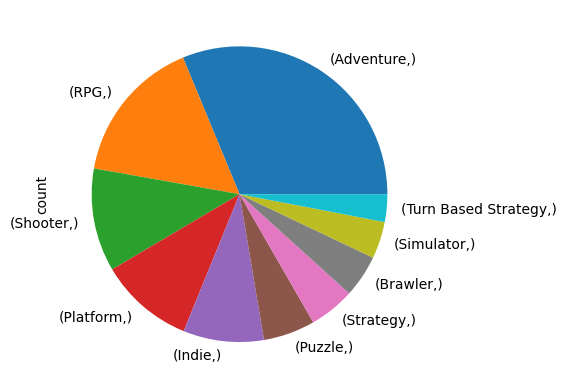

In [25]:
shortlist_genres = pd.DataFrame(list_genres.value_counts().head(10))
shortlist_plot = list_genres.value_counts().head(10).plot(kind='pie')

It's worth mentioning, there are criticsms about pie charts in general. Humans aren't very good at determining angles and comparing pie slices. For more discussion on this topic, you can read <a href="https://www.data-to-viz.com/caveat/pie.html">The Issue With the Pie Chart</a>.

<h3>Bivariate Analysis or Correlations</h3>

So far, we've focused on univariate analysis, that is, looking at one variable or column at a time. How many of each genre? What's the average rating? etc.

The next step is to look at how two variables seem to be related to each other. Which genres are played by more players? Is there a relationship between the number of reviews and the average rating?

In [26]:
shortlist_genres

,count
Genres,
Adventure,734
RPG,375
Shooter,265
Platform,243
Indie,207
Puzzle,133
Strategy,117
Brawler,109
Simulator,95


In [27]:
# create a sample DataFrame with a column containing multiple values
plays_genre_df = pd.DataFrame({
    'Title': data['Title'].tolist(),
    'Genres': data['Genres'].tolist(),
    'Plays': data['Plays'].tolist(),
    'Playing': data['Playing'].tolist()
})
# use the explode method to transform the 'Genres' column
plays_genre_df = plays_genre_df.explode('Genres')

top10genres = ['Adventure','RPG','Shooter','Platform','Indie','Puzzle','Strategy','Brawler','Simulator','Turn Based Strategy']

plays_genre_df = plays_genre_df.groupby('Genres')[['Plays', 'Playing']].sum().reset_index()
plays_genre_df = plays_genre_df.loc[plays_genre_df['Genres'].isin(top10genres)]
plays_genre_df

,Genres,Plays,Playing
0,Adventure,51803900.0,116567400.0
2,Brawler,4341700.0,18416100.0
5,Indie,21265200.0,29092300.0
9,Platform,13937500.0,31057000.0
11,Puzzle,12246200.0,15868000.0
13,RPG,31458900.0,68856500.0
16,Shooter,16726300.0,40331000.0
17,Simulator,8002600.0,12854700.0
19,Strategy,8219900.0,16361600.0
21,Turn Based Strategy,4762100.0,12504200.0


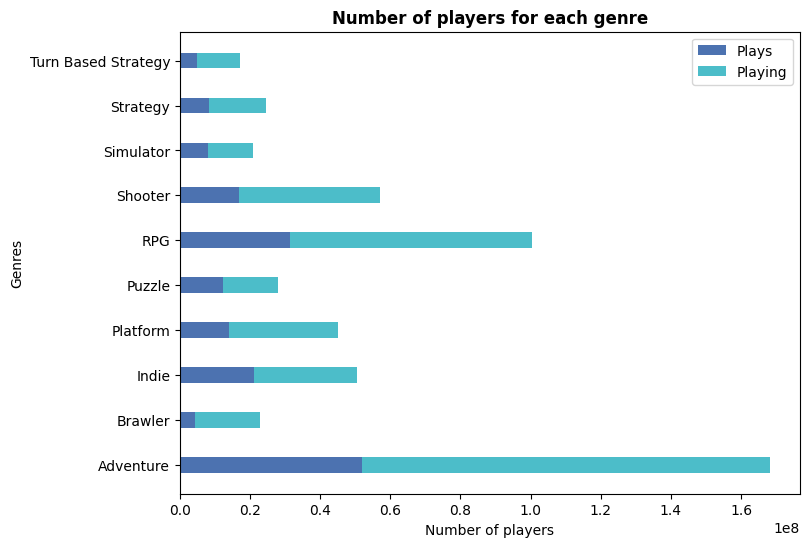

In [28]:
index = plays_genre_df['Genres'].tolist()
value1 = plays_genre_df['Plays'].tolist()
value2 = plays_genre_df['Playing'].tolist()

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
bar1 = ax.barh(index, value1, bar_width, label='Plays', color='#4c72b0')
bar2 = ax.barh(index, value2, bar_width, left=value1, label='Playing', color='#4cbdc9')

# Add labels and legend
ax.set_xlabel('Number of players')
ax.set_ylabel('Genres')
ax.set_title('Number of players for each genre', fontweight='bold')
ax.legend(loc='upper right')


plt.show()

<h2>Task</h2>
Choose a dataset on a topic that's interesting to you. You can search on <a href="https://www.kaggle.com/datasets">Kaggle</a> or another public data repository. Create an Exploratory Data Analysis (what we've done here) of your own.